In [11]:
import pandas as pd
import numpy as np
import json
import sys
from yahoo_oauth import OAuth2
from json import dumps
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%matplotlib inline

[2018-11-16 15:37:50,941 DEBUG] [matplotlib.pyplot.pyplot.switch_backend] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [12]:
# import dictionary of Yahoo Manager Names to Real Life Nicknames
with open('../teams/team_mapping_initials.txt', 'r') as f:
    dict_init = dict(eval(f.read()))
with open('../teams/team_mapping_full.txt', 'r') as f:
    dict_full = dict(eval(f.read()))
    
#Need to create mapping between Real Name and Initials, in form of new dictionary
dict_full_init = {}
for name in dict_full:
    dict_full_init[dict_full[name]] = dict_init[name]
    
# names--> manager initials
names = []

weeks = ['wk_1', 'wk_2', 'wk_3', 'wk_4', 'wk_5', 'wk_6', 'wk_7', 'wk_8',
         'wk_9', 'wk_10', 'wk_11', 'wk_12', 'wk_13', 'wk_14', 'wk_15', 'wk_16']

In [13]:
week = 1
df_total_scores = pd.DataFrame()
df_total_scores = pd.DataFrame(columns=weeks, index = names)
for week in range(1,17):
    df_scores = pd.read_csv('./weekly_scores/wk_'+str(week)+'_scores.csv', index_col='Unnamed: 0')
    df_scores = df_scores.rename(columns=dict_full_init)
    
    week_id = 'wk_' + str(week)
    #df_total_scores[week_id] = pd.Series()
    positions = ['QB', 'WR1', 'WR2', 'WR3', 'RB1', 'RB2', 'TE', 'W/R/T','K', 'DEF']
    for manager in df_scores:
        df_total_scores.loc[manager, week_id] = df_scores.loc[positions, manager].sum()


In [14]:
#df_total_scores = df_total_scores.reset_index()
df_total_scores.replace(0, np.nan, inplace=True)
df_total_scores

,wk_1,wk_2,wk_3,wk_4,wk_5,wk_6,wk_7,wk_8,wk_9,wk_10,wk_11,wk_12,wk_13,wk_14,wk_15,wk_16
Kyle B,92.15,152.95,76.70,126.70,88.75,117.25,107.95,84.45,108.10,139.90,NaN,NaN,NaN,NaN,NaN,NaN
Alex M,129.30,132.00,108.20,137.80,131.95,124.20,164.30,150.75,77.95,135.15,NaN,NaN,NaN,NaN,NaN,NaN
Daniel,160.60,142.35,129.25,149.30,161.90,176.95,122.65,159.30,153.75,147.95,46.5,NaN,NaN,NaN,NaN,NaN
Nathaniel P,94.85,110.50,120.45,149.70,125.65,139.10,129.70,128.60,127.45,95.70,27.0,NaN,NaN,NaN,NaN,NaN
Joey,90.95,95.15,111.00,134.35,126.00,72.25,93.90,132.85,110.15,154.30,NaN,NaN,NaN,NaN,NaN,NaN
Sean,65.70,129.00,126.95,121.40,109.10,86.25,80.45,127.35,99.00,119.70,3.1,NaN,NaN,NaN,NaN,NaN
Eric R,73.75,101.80,65.55,82.30,108.05,103.10,77.95,95.70,68.65,84.90,6.0,NaN,NaN,NaN,NaN,NaN
momo,180.30,106.10,122.30,89.80,102.85,129.75,142.40,116.40,102.10,101.35,NaN,NaN,NaN,NaN,NaN,NaN
Kevinthedog,98.30,134.10,100.05,153.85,93.15,123.55,115.05,114.75,105.95,115.50,12.7,NaN,NaN,NaN,NaN,NaN
Patrick,114.15,117.10,96.55,111.35,105.10,101.50,129.35,125.35,81.85,118.55,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Create and save .csv file of scores above locally
df_total_scores.to_csv('weekly_scores_export.csv', encoding='utf-8')

[2018-11-16 15:38:48,944 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:38:49,262 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:38:49,344 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:38:49,660 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos


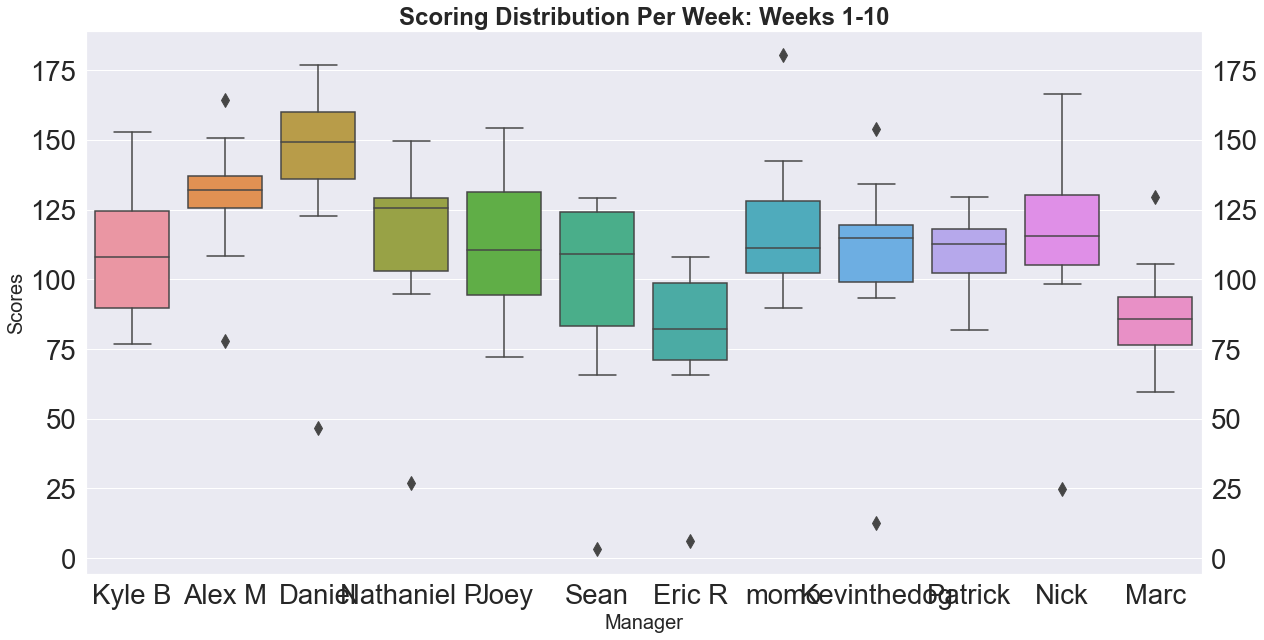

In [17]:
order = [
    'Kyle B', 'Alex M', 'Daniel',
    'Nathaniel P', 'Joey', 'Sean',
    'Eric R', 'momo', 'Kevinthedog',
    'Patrick', 'Nick', 'Marc'
        ]
###################
week = 10
##################

fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.boxplot(data=data, 
                    order=order,
                    fliersize=10
                   )
ax.set_title("Scoring Distribution Per Week: Weeks 1-%s" % (week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Scores", fontsize=20)
plt.show(fig)


[2018-11-16 15:39:13,966 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:39:14,304 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:39:14,358 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:39:14,395 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos


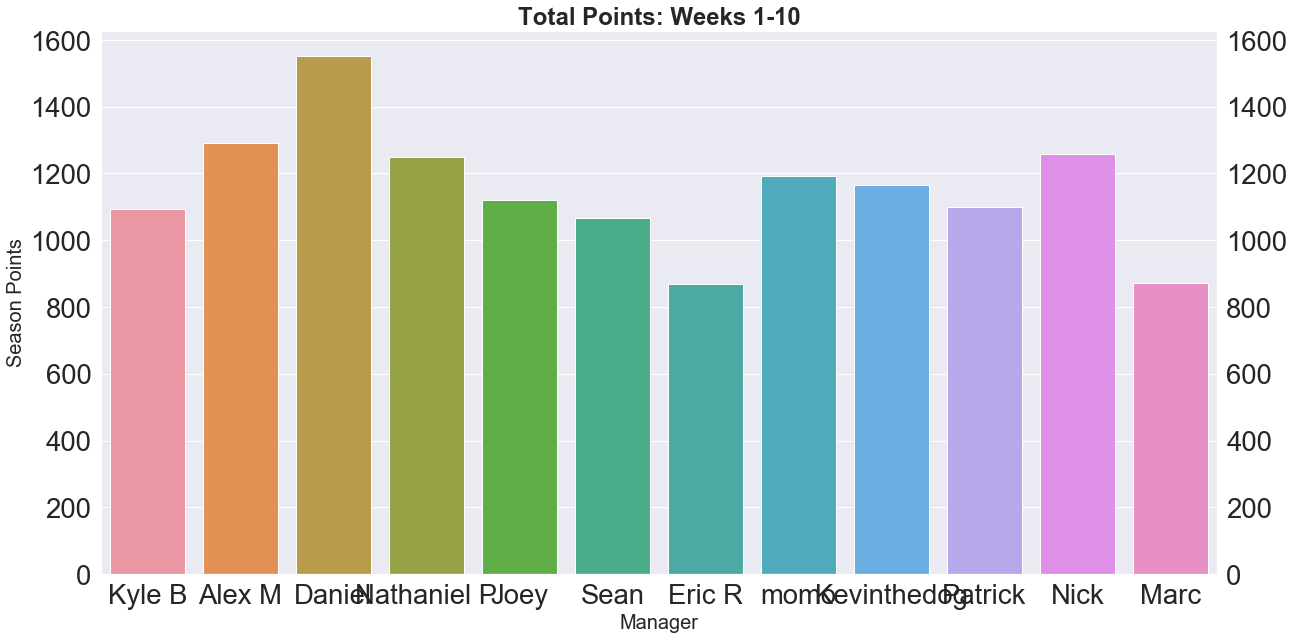

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.T
graph = sns.barplot(data=data, 
                    order=order,
                    estimator=sum,
                    ci=None
                   )
ax.set_title("Total Points: Weeks 1-%s" %(week),
             fontsize = 24, 
             fontweight="bold")

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Season Points", fontsize=20)
plt.show(fig)

[2018-11-16 15:39:28,576 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:39:28,860 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:39:28,910 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos
[2018-11-16 15:39:28,946 DEBUG] [matplotlib.axes._base._base._update_title_position] update_title_pos


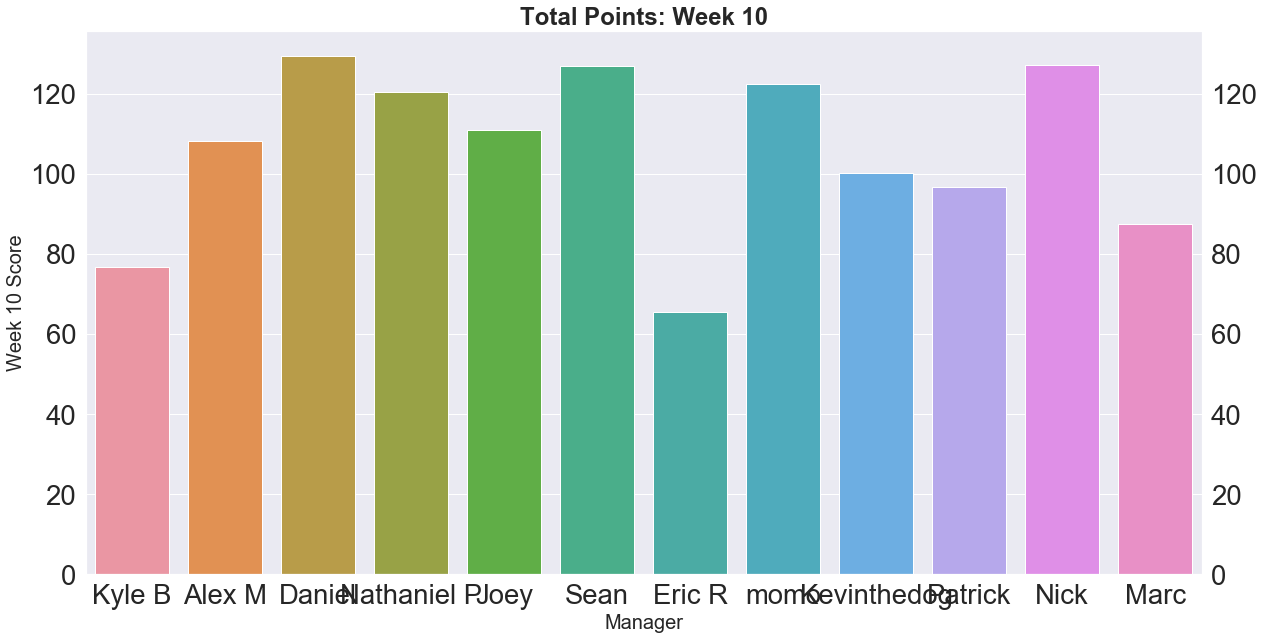

In [19]:


fig, ax = plt.subplots(figsize=(20,10))
data = df_total_scores.reset_index()
graph = sns.barplot(data=data, 
                    order=order,
                    #estimator=sum,
                    y='wk_3',
                    x='index',
                    ci=None,
                    orient='v'
                   )
ax.set_title("Total Points: Week %s" %(week),
             fontsize = 24, 
             fontweight="bold")
data = df_total_scores.T

ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')
sns.set_style("darkgrid")
sns.set_palette("Spectral", 12)
sns.set(font_scale = 2.5)

plt.xlabel("Manager", fontsize=20)
plt.ylabel("Week %s Score" %(week), fontsize=20)
plt.show(fig)